In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, f1_score, classification_report

In [2]:
# Read the dataset
phis = pd.read_csv('Website Phishing.csv')

In [3]:
phis.head()

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
0,1,-1,1,-1,-1,1,1,1,0,0
1,-1,-1,-1,-1,-1,0,1,1,1,1
2,1,-1,0,0,-1,0,-1,1,1,0
3,1,0,1,-1,-1,0,1,1,0,0
4,-1,-1,1,-1,0,0,-1,1,1,0


In [4]:
phis.describe()

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
count,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000
mean,0.237990,-0.258684,0.327421,-0.223208,-0.025129,0.000000,-0.053215,0.219512,-0.113821,0.114560
std,0.916389,0.679072,0.822193,0.799682,0.936262,0.806776,0.762552,0.975970,0.954773,0.318608
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
phis.shape

(1353, 10)

<Axes: xlabel='Result', ylabel='count'>

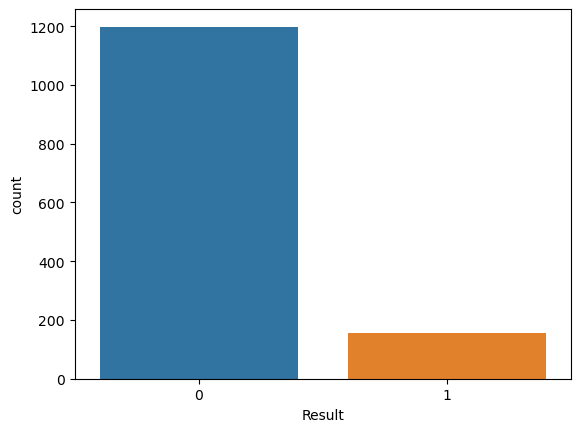

In [6]:
sns.countplot(x=phis['Result'])

In [7]:
phis['Result'].value_counts()

0    1198
1     155
Name: Result, dtype: int64

In [8]:
# Define feature columns and target column
feature_cols = ['SFH', 'popUpWidnow', 'SSLfinal_State', 'Request_URL','URL_of_Anchor', 'web_traffic', 'URL_Length', 'age_of_domain','having_IP_Address']
target_col = ['Result']

In [9]:
# Split the dataset into features (X) and target (y)
X = phis[feature_cols]
y = phis[target_col]

In [10]:
# Reshape y to a 1-dimensional array
y = y.values.ravel()

In [11]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [12]:
# K-Nearest Neighbors classifier
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)
knn_y_pred = knn_clf.predict(X_test)

In [13]:
# Support Vector Machine classifier
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train, y_train)
svm_y_pred = svm_clf.predict(X_test)

In [14]:
# Logistic Regression classifier
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_y_pred = lr_clf.predict(X_test)

In [15]:
# Decision Tree classifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
dt_y_pred = dt_clf.predict(X_test)

In [16]:
# Gradient Boosting classifier
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)
gb_y_pred = gb_clf.predict(X_test)

In [17]:
# Calculate confusion matrix and F1-score for each classifier
classifiers = [('K-Nearest Neighbors', knn_y_pred), ('Support Vector Machine',svm_y_pred),
('Logistic Regression', lr_y_pred), ('Decision Tree', dt_y_pred),
('Gradient Boosting', gb_y_pred)]

In [20]:
import numpy as np

for clf_name, y_pred in classifiers:
    cm = confusion_matrix(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    tn = cm[0, 0]
    fp = cm[0, 1]
    fn = cm[1, 0]
    tp = cm[1, 1]
    fnr = fn / (fn + tp)
    # Calculate precision (Positive Prediction Value)
    if tp + fp == 0:
        ppv = np.nan
    else:
        ppv = tp / (tp + fp)
    # Calculate positive likelihood ratio
    if fp == 0:
        pl = np.nan
    else:
        pl = tp / fp
    npv = tn / (tn + fn)
    nl = fn / tn
    print("Classifier:", clf_name)
    print("Confusion Matrix:")
    print(cm)
    print("F1-Score:", f1)
    print("False Negative Rate:", fnr)
    print("Positive Prediction Value (Precision):", ppv)
    print("Negative Prediction Value:", npv)
    print("Positive Likelihood Ratio:", pl)
    print("Negative Likelihood Ratio:", nl)
    print()

Classifier: K-Nearest Neighbors
Confusion Matrix:
[[356   3]
 [ 44   3]]
F1-Score: 0.11320754716981131
False Negative Rate: 0.9361702127659575
Positive Prediction Value (Precision): 0.5
Negative Prediction Value: 0.89
Positive Likelihood Ratio: 1.0
Negative Likelihood Ratio: 0.12359550561797752

Classifier: Support Vector Machine
Confusion Matrix:
[[359   0]
 [ 47   0]]
F1-Score: 0.0
False Negative Rate: 1.0
Positive Prediction Value (Precision): nan
Negative Prediction Value: 0.8842364532019704
Positive Likelihood Ratio: nan
Negative Likelihood Ratio: 0.1309192200557103

Classifier: Logistic Regression
Confusion Matrix:
[[359   0]
 [ 47   0]]
F1-Score: 0.0
False Negative Rate: 1.0
Positive Prediction Value (Precision): nan
Negative Prediction Value: 0.8842364532019704
Positive Likelihood Ratio: nan
Negative Likelihood Ratio: 0.1309192200557103

Classifier: Decision Tree
Confusion Matrix:
[[343  16]
 [ 41   6]]
F1-Score: 0.17391304347826086
False Negative Rate: 0.8723404255319149
Posit

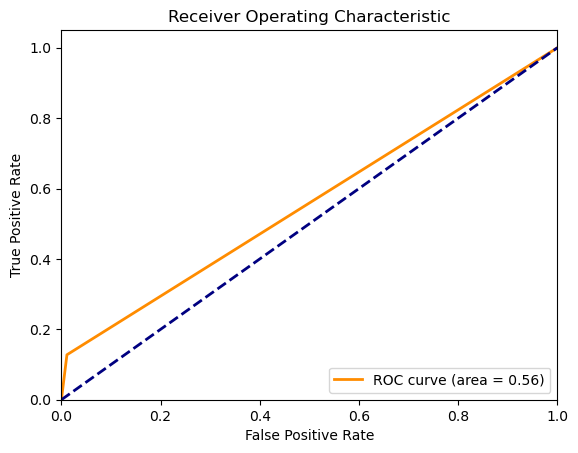

In [22]:
from sklearn.metrics import roc_curve, auc
# Calculate false positive rate and true positive rate
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [23]:
# Create a list of classifiers and their corresponding names
classifiers = [
('K-Nearest Neighbors', knn_clf),
('Support Vector Machine', svm_clf),
('Logistic Regression', lr_clf),
('Decision Tree', dt_clf),
('Gradient Boosting', gb_clf)
]

# Iterate over each classifier
for clf_name, clf in classifiers:
    # Predict the labels for the test set
    y_pred = clf.predict(X_test)
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    # Print classifier name and confusion matrix
    print("Classifier:", clf_name)
    print("Confusion Matrix:")
    print(cm)
    print()

Classifier: K-Nearest Neighbors
Confusion Matrix:
[[356   3]
 [ 44   3]]

Classifier: Support Vector Machine
Confusion Matrix:
[[359   0]
 [ 47   0]]

Classifier: Logistic Regression
Confusion Matrix:
[[359   0]
 [ 47   0]]

Classifier: Decision Tree
Confusion Matrix:
[[343  16]
 [ 41   6]]

Classifier: Gradient Boosting
Confusion Matrix:
[[355   4]
 [ 41   6]]



Classifier: K-Nearest Neighbors
Confusion Matrix:
[[356   3]
 [ 44   3]]



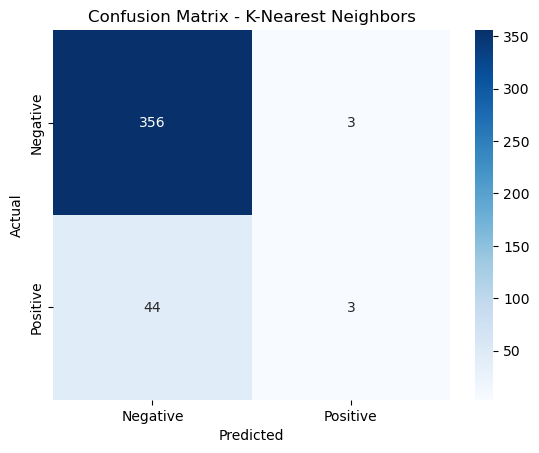

Classifier: Support Vector Machine
Confusion Matrix:
[[359   0]
 [ 47   0]]



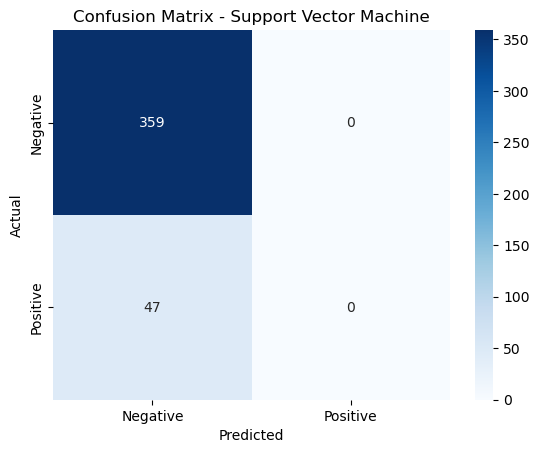

Classifier: Logistic Regression
Confusion Matrix:
[[359   0]
 [ 47   0]]



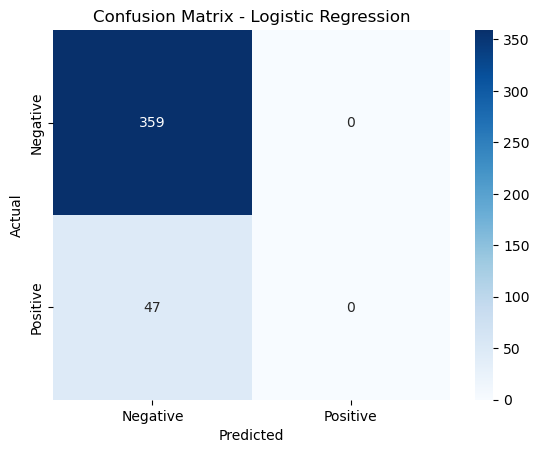

Classifier: Decision Tree
Confusion Matrix:
[[343  16]
 [ 41   6]]



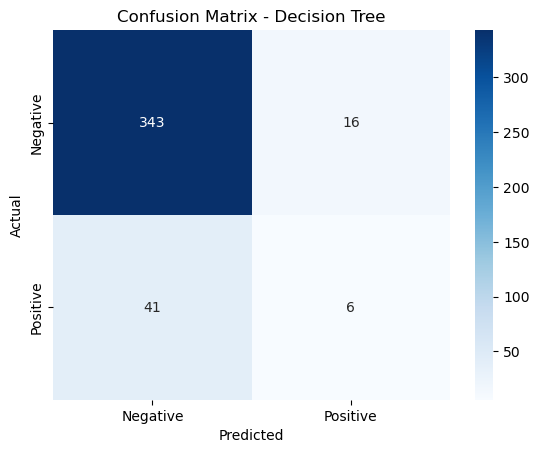

Classifier: Gradient Boosting
Confusion Matrix:
[[355   4]
 [ 41   6]]



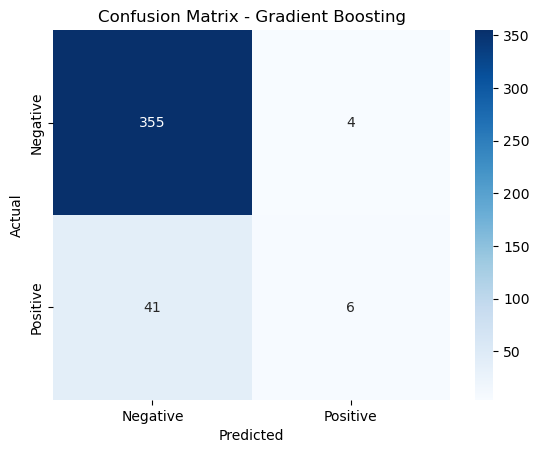

In [24]:
# Create a list of classifiers and their corresponding names
classifiers = [
    ('K-Nearest Neighbors', knn_clf),
    ('Support Vector Machine', svm_clf),
    ('Logistic Regression', lr_clf),
    ('Decision Tree', dt_clf),
    ('Gradient Boosting', gb_clf)
]

# Define the labels for the confusion matrix
labels = ['Negative', 'Positive']

# Iterate over each classifier
for clf_name, clf in classifiers:
    # Predict the labels for the test set
    y_pred = clf.predict(X_test)
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    # Print classifier name and confusion matrix
    print("Classifier:", clf_name)
    print("Confusion Matrix:")
    print(cm)
    print()
    # Display confusion matrix as heatmap
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels,yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix - {}'.format(clf_name))
    plt.show()